In [3]:
!pip install xlrd

     -------------------------------------- 96.5/96.5 kB 690.3 kB/s eta 0:00:00


In [2]:
import pandas as pd
df=pd.read_excel('titanic.xls')

In [5]:
df.head(n=10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [6]:
df.shape

(1309, 14)

In [7]:
df.ndim

2

In [9]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [10]:
df.drop(['home.dest','fare','name'],axis=1,inplace=True)

In [11]:
df.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'cabin',
       'embarked', 'boat', 'body'],
      dtype='object')

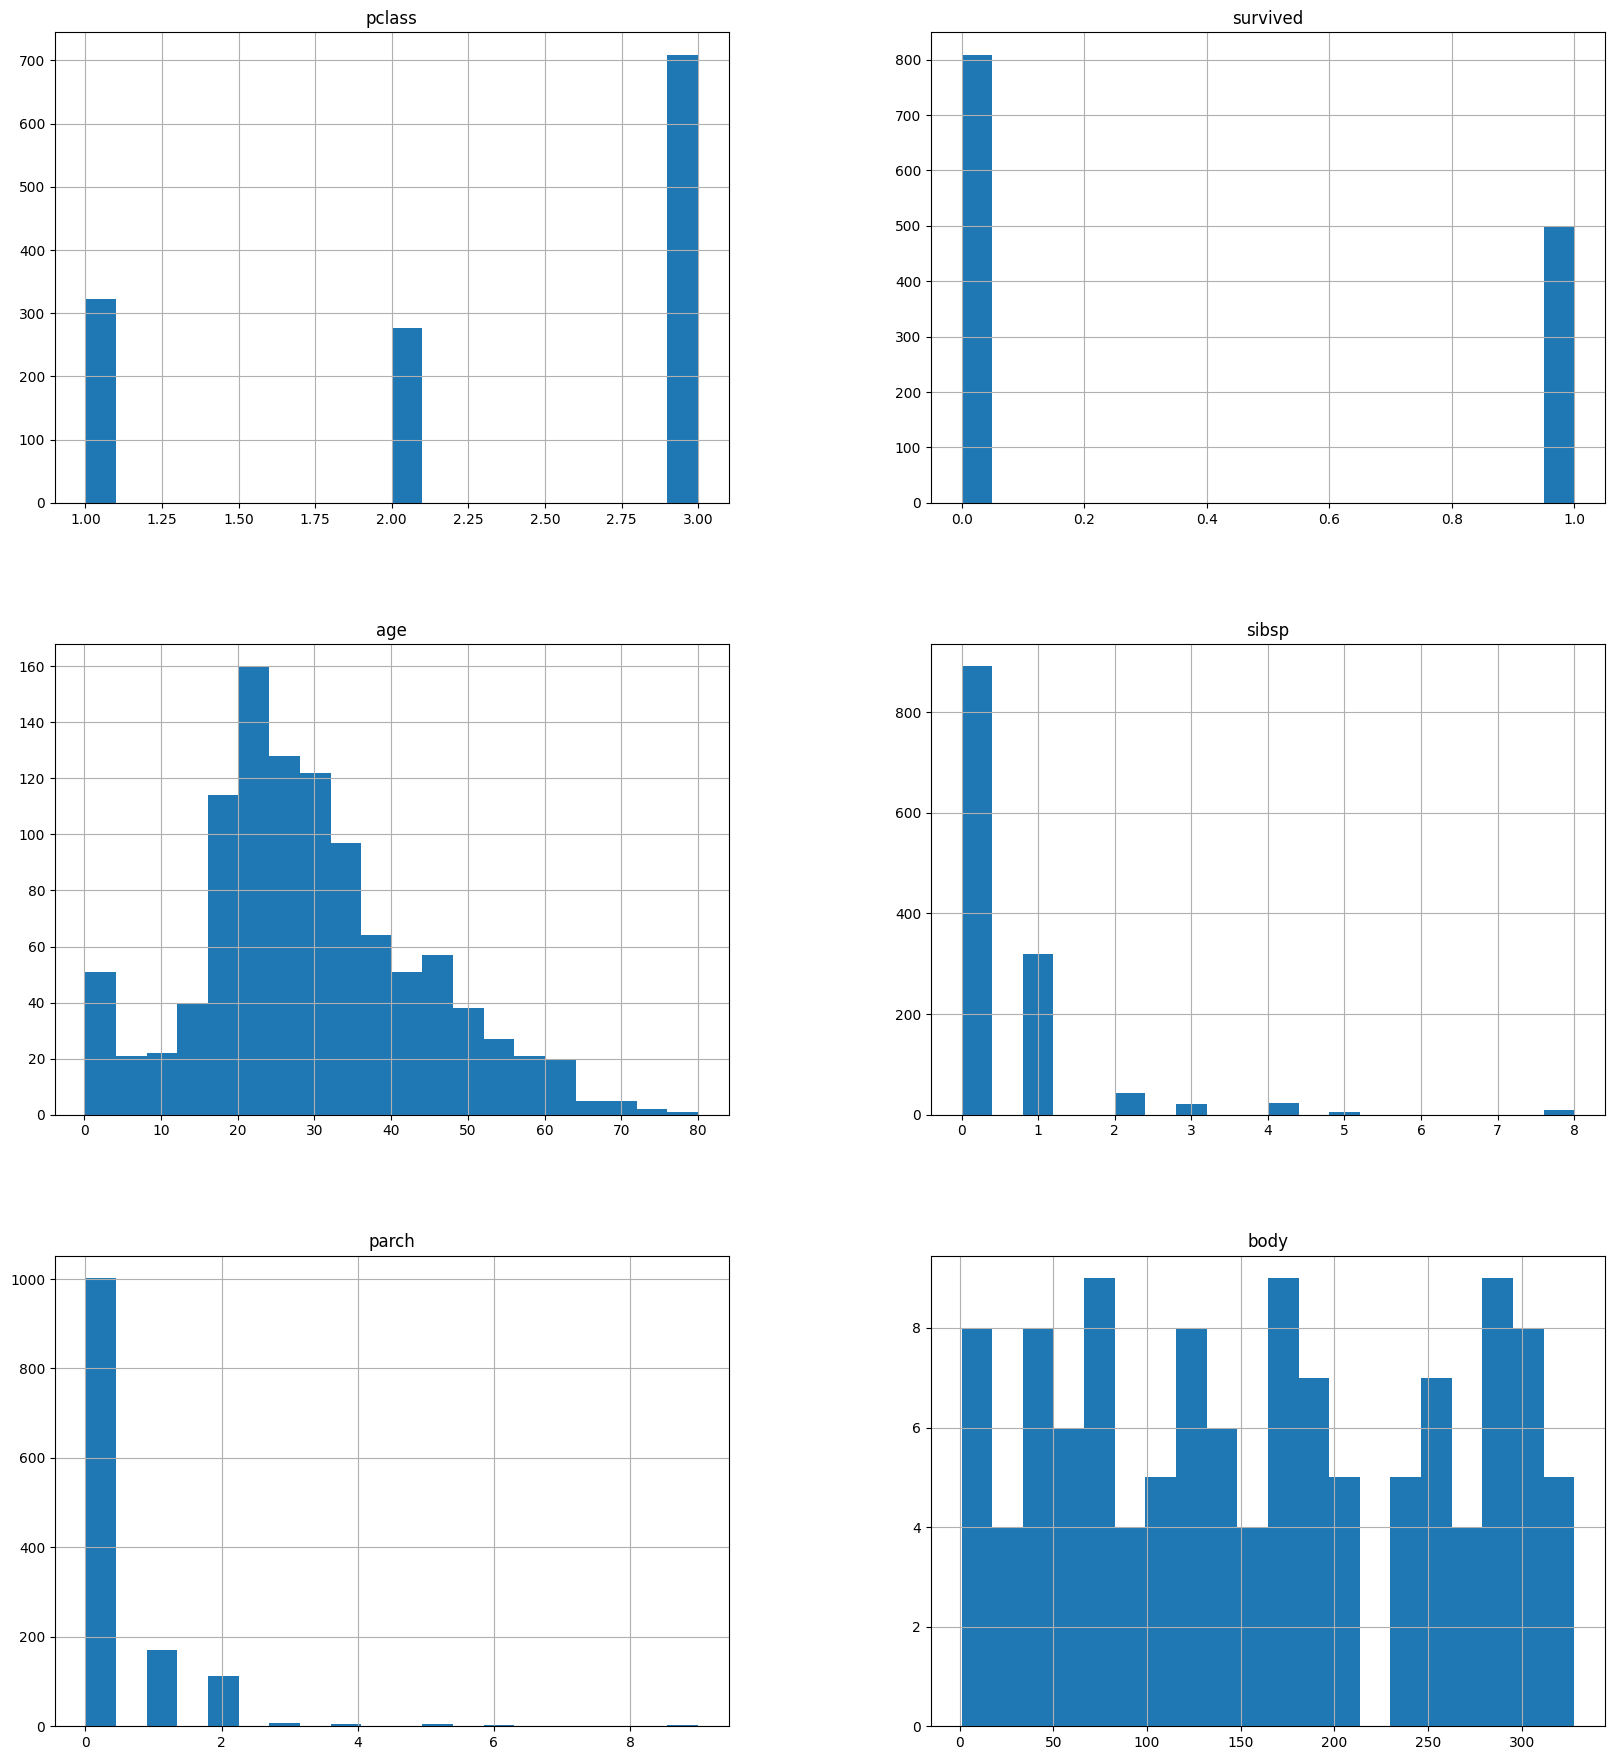

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(figsize=(20,22),bins=20)
plt.show()

In [28]:
df_copy=df.copy()
df_copy.drop(df_copy[df_copy['age']>70]['age'].index,inplace=True)

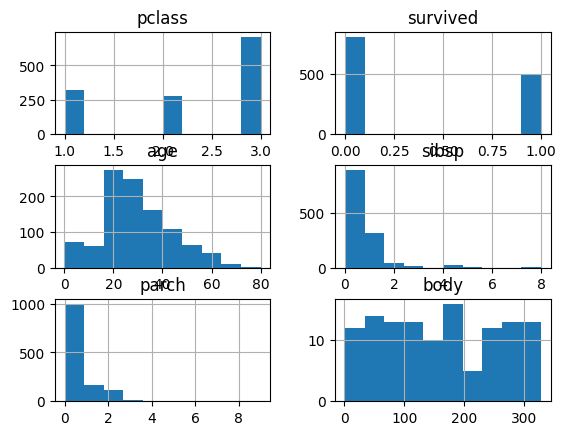

In [25]:
df_copy.hist()
plt.show()

In [29]:
print(df_copy.shape)
print(df.shape)

(1303, 11)
(1309, 11)


In [32]:
df['sex'].value_counts()['male']

843

In [34]:
dfmale=df[df['sex']=='male']
dfmale.shape

(843, 11)

In [40]:
dfser=dfmale[dfmale['survived']==1]
dfser.shape[0]

161

In [47]:
for i in df['sex'].unique():
    print(i)
    fmale=df[df['sex']==i]
    surmale=fmale[fmale['survived']==1]
    per= (surmale.shape[0]/fmale.shape[0])*100
    print("survive_percent= %.2f" %per ,"%")

female
survive_percent= 72.75 %
male
survive_percent= 19.10 %


In [54]:
for i in df['pclass'].unique():
    print(i)
    df_cou=df[df['pclass']==i]
    df_surv=df_cou[df_cou['survived']==1]
    per1=(df_surv.shape[0]/df_cou.shape[0])*100
    print("the per in each class= %.2f" %per1 ,"%")

1
the per in each class= 61.92 %
2
the per in each class= 42.96 %
3
the per in each class= 25.53 %


In [18]:
def ages (age):
    if age < 4:
        return "baby"
    elif age < 10:
        return "child"
    elif age < 40:
        return "teenager"
    else:
        return "old"
df['new_age']=df['age']
for i in range(df.shape[0]):
    df['new_age'].iloc[i]= ages(df['age'].iloc[i])
df.head()     


C:\Users\HI-TECH\AppData\Local\Temp\ipykernel_8316\477632307.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_age'].iloc[i]= ages(df['age'].iloc[i])


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,new_age
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",teenager
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",teenager
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",teenager
